In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from pymatgen.analysis.diffraction.xrd import XRDCalculator

# Téléchargement du fichier CIF

In [2]:
with MPRester("cG5llIAs5Ub9zbbJaG") as m:
    #le code ci-dessous télécharge la cellule primitive du materiau
    #pour télécharger la cellule CONVENTIONNELLE standard il faut modifier le paramètre << conventional_unit_cell = True >>
    structure = m.get_structure_by_material_id("mp-961713", conventional_unit_cell = False)
    

    w = CifWriter(structure)
    w.write_file("ZrSnPt_mp-961713.cif")
    
    print("Cliquez sur le lien pour télécharger le fichier .CIF du materiau ZrSnPt")
    
    display(FileLink("ZrSnPt_mp-961713.cif"))

Cliquez sur le lien pour télécharger le fichier .CIF du materiau ZrSnPt


/home/users/c/m/cmoureau/ZrSnPt_mp-961713.cif

# Analyse des 3 premiers pics

Dans cette tâche, on va étudier les trois premiers pics du diffractogrammes du matériau ZrSnPt. Durant toute cette partie, on considère un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å. 

Le rayonnement incident X crée des phénomènes d'interférences (constructives ou destructives) et donc de diffraction par la structure du cristal.

A chaque pic sont associés une intensité, des indices hkl avec leur multiplicité, une distance $d_{hkl}$ (distance entre deux plans (hkl) consécutifs du réseau direct) ainsi qu'un angle 2$\theta$ ($\theta$ correspond à l'angle entre les directions d'incidence et d'observation).

In [3]:
longueur_onde = 1.54060
xrd = XRDCalculator(longueur_onde)
diff_pattern = xrd.get_pattern(structure)

#récuperation des informations utiles pour les 3 premiers pics
angles = diff_pattern.x[:3]
intensites = diff_pattern.y[:3]
indices = diff_pattern.hkls[:3]
distances = diff_pattern.d_hkls[:3]

### Premier pic

In [4]:
print("Pic n°1\n")
print("Angle 2θ associé: ", angles[0])
print("L'intensité du pic est: ", intensites[0])
print("Indices (h, k, l) associés: ", indices[0])
print("Distance d_hkl associée: ", distances[0])

Pic n°1

Angle 2θ associé:  23.980186107070754
L'intensité du pic est:  55.34227180413656
Indices (h, k, l) associés:  [{'hkl': (1, 1, 1), 'multiplicity': 2}, {'hkl': (1, 0, 0), 'multiplicity': 6}]
Distance d_hkl associée:  3.7079547389343004


### Deuxième pic

In [5]:
print("Pic n°2\n")
print("Angle 2θ associé: ", angles[1])
print("L'intensité du pic est: ", intensites[1])
print("Indices (h, k, l) associés: ", indices[1])
print("Distance d_hkl associée: ", distances[1])

Pic n°2

Angle 2θ associé:  27.75896822184578
L'intensité du pic est:  0.4750095029386604
Indices (h, k, l) associés:  [{'hkl': (1, 1, 0), 'multiplicity': 6}]
Distance d_hkl associée:  3.211183


### Troisème pic

In [6]:
print("Pic n°3\n")
print("Angle 2θ associé: ", angles[2])
print("L'intensité du pic est: ", intensites[2])
print("Indices (h, k, l) associés: ", indices[2])
print("Distance d_hkl associée: ", distances[2])

Pic n°3

Angle 2θ associé:  39.6614200917061
L'intensité du pic est:  100.0
Indices (h, k, l) associés:  [{'hkl': (2, 1, 1), 'multiplicity': 6}, {'hkl': (1, 0, -1), 'multiplicity': 6}]
Distance d_hkl associée:  2.2706492749309612


# Diffractogramme

Visualisation de l'instensité des 3 premiers pics en fonction des angles:




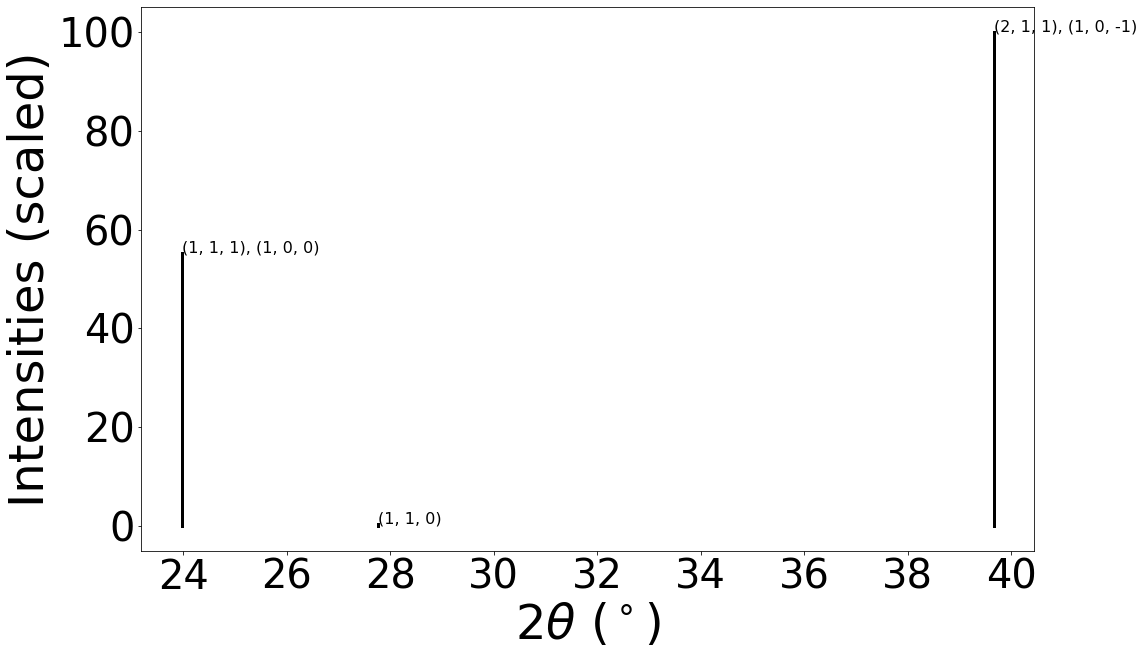

In [9]:
print("Visualisation de l'instensité des 3 premiers pics en fonction des angles:\n\n")
xrd.show_plot(structure, annotate_peaks=True, two_theta_range=[0, 45])